In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

C:\Users\katal\Documents\ProgramsPackages\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
Name        1313 non-null object
PClass      1312 non-null object
Age         756 non-null float64
Sex         1313 non-null object
Survived    1313 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [5]:
for i in df.columns[1:]:
    print(f'Column: {i}, unique_values: {df[i].unique()}  Na_values: {df[i].isna().sum()}', end=" \n\n")

Column: PClass, unique_values: ['1st' '2nd' nan '3rd']  Na_values: 1 

Column: Age, unique_values: [29.    2.   30.   25.    0.92 47.   63.   39.   58.   71.   19.     nan
 50.   24.   36.   37.   26.   28.   45.   22.   41.   48.   44.   59.
 60.   53.   33.   14.   11.   49.   46.   27.   31.   64.   55.   70.
 69.   38.   17.    4.   23.   35.   54.   21.   52.   16.   51.   42.
 40.   15.   65.   18.   56.   43.   61.   13.   34.    6.   57.   32.
 62.   67.   20.    1.   12.    0.83  8.    7.    3.    0.8   9.    5.
  0.33  0.17 10.    1.5 ]  Na_values: 557 

Column: Sex, unique_values: ['female' 'male']  Na_values: 0 

Column: Survived, unique_values: [1 0]  Na_values: 0 



In [6]:
plt.rcParams['figure.figsize'] = (15,8)

### Gender

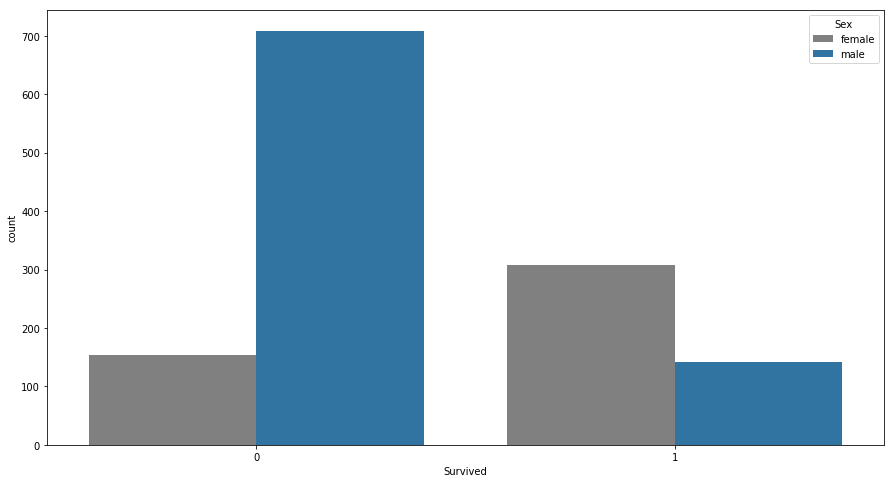

In [7]:
sns.countplot(df['Survived'], hue=df['Sex'], palette=['grey', next(color_cycle)])

- **So we can map female to 1 and male to 0 (More men have dided afterall)**

In [8]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})

### Age

In [9]:
# Imputing NaN with mean
median_age = df['Age'].dropna().mean()
df['Age'].fillna(median_age, inplace=True)

In [10]:
min_age = df['Age'].min()
max_age = df['Age'].max()
(min_age, max_age) 

(0.17, 71.0)

In [11]:
df.iloc[np.argmin(df['Age'])]

Name        Dean, Miss Elizabeth Gladys (Millve)
PClass                                       3rd
Age                                         0.17
Sex                                            1
Survived                                       1
Name: 763, dtype: object

In [12]:
age_groups = [0,10,20,30,40,50,60,75]
lbls = ['ag_' + str(age_groups[i]) + '_' + str(age_groups[i+1]) for i in range(len(age_groups)-1)]
df['Age_groups'] = pd.cut(df['Age'], bins = age_groups, labels = lbls)
df = pd.concat([df, pd.get_dummies(df['Age_groups'])], axis=1)

In [13]:
df.tail()

,Name,PClass,Age,Sex,Survived,Age_groups,ag_0_10,ag_10_20,ag_20_30,ag_30_40,ag_40_50,ag_50_60,ag_60_75
1308,"Zakarian, Mr Artun",3rd,27.0,0,0,ag_20_30,0,0,1,0,0,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,0,0,ag_20_30,0,0,1,0,0,0,0
1310,"Zenni, Mr Philip",3rd,22.0,0,0,ag_20_30,0,0,1,0,0,0,0
1311,"Lievens, Mr Rene",3rd,24.0,0,0,ag_20_30,0,0,1,0,0,0,0
1312,"Zimmerman, Leo",3rd,29.0,0,0,ag_20_30,0,0,1,0,0,0,0


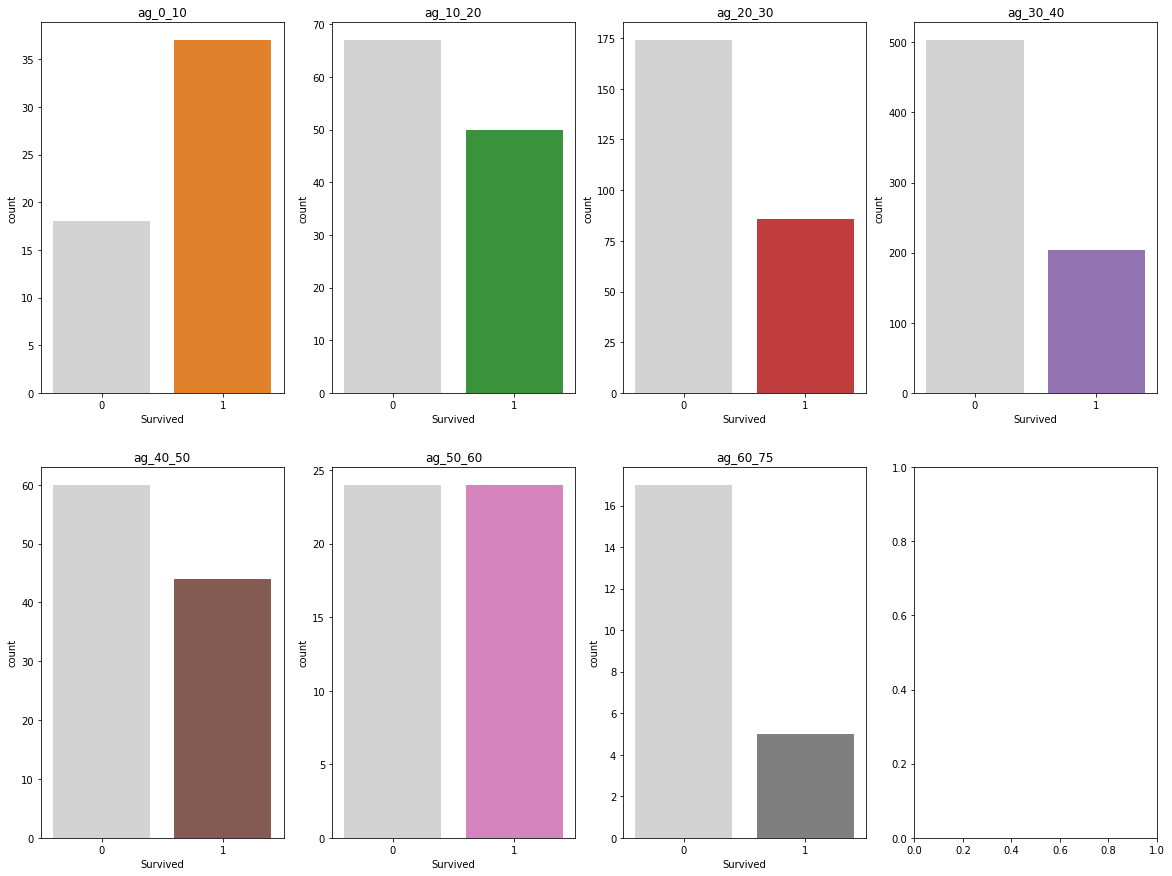

In [14]:
fig, axs = plt.subplots(2,4,figsize=(20,15))
axs = axs.flatten()
ax_idx = 0
for i, v in df.groupby('Age_groups'):
    sns.countplot(v['Survived'], ax=axs[ax_idx], palette=['#D3D3D3', next(color_cycle)])
    axs[ax_idx].set_title(i)
    ax_idx += 1
    

In [15]:
df.drop('Age_groups', axis=1, inplace=True)

## Pclass

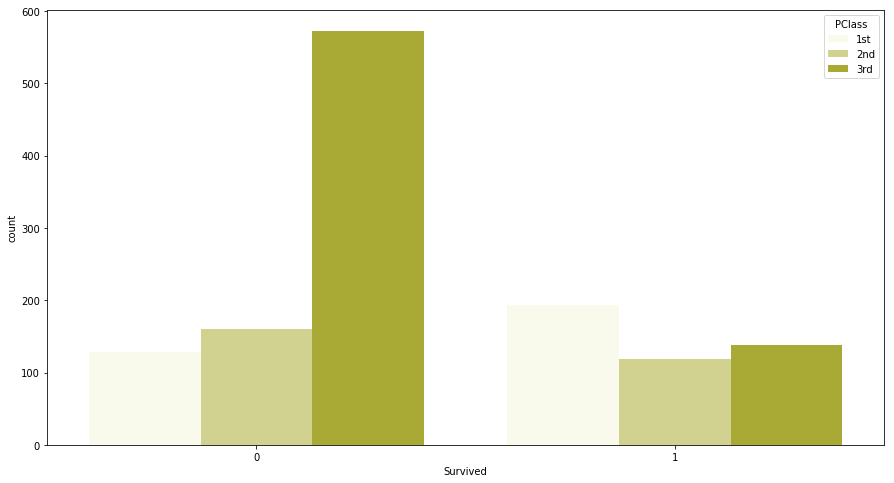

In [16]:
sns.countplot(df['Survived'], hue=df['PClass'], color=next(color_cycle))

In [17]:
df['PClass'] = df['PClass'].map({'1st':2, '2nd':1, '3rd':0})

In [18]:
df['PClass'] = df['PClass'].fillna(0)

### Names

In [19]:
df['Name'].apply(lambda x: x.split(' ')[1]).value_counts()

Mr              729
Miss            229
Mrs             191
Master           56
Ms               16
Dr                8
Rev               8
der               5
y                 5
(Joseph),         3
Billiard,         3
(Thomas),         3
Impe,             3
Major             2
(srallah),        2
Thomas            2
Col               2
Gordon,           2
Colonel           2
Messemaeker,      2
(Kareem),         2
Carlo,            2
Mlle              2
Villiers,         1
(Icabod),         1
Brito,            1
William           1
(Schmidt),        1
Jenny             1
(Trembisky),      1
Hilda             1
(Sitik),          1
Delia             1
(Borak),          1
(Russell),        1
Sander            1
Albert            1
the               1
Derhoef,          1
Richard           1
(Kalil),          1
W                 1
Nikolai           1
Eino              1
Oscar             1
Simon             1
Mulder,           1
de                1
Mansouer          1
Nils              1


In [20]:
titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Ms', 'Rev', 'Dr']
for i in titles:
    df['is_' + str(i)] = df['Name'].apply(lambda x: x.split(' ')[1] == i)
    df['is_' + str(i)] = df['is_' + str(i)].astype('int64') 
df.drop('Name',axis=1,inplace=True)

In [21]:
df.head()

,PClass,Age,Sex,Survived,ag_0_10,ag_10_20,ag_20_30,ag_30_40,ag_40_50,ag_50_60,ag_60_75,is_Mr,is_Miss,is_Mrs,is_Master,is_Ms,is_Rev,is_Dr
0,2.0,29.00,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2.0,2.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,30.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,2.0,25.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2.0,0.92,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting for train_test

In [23]:
# size = 0.7
# y = df['Survived']
# x = df.drop('Survived', axis=1)
# train_x, train_y = x[:int(len(x)*size)], y[:int(len(x)*size)]
# test_x, test_y = x[int(len(x)*size):], y[int(len(x)*size):]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y = df['Survived']
x = df.drop('Survived', axis=1)

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)

In [25]:
train_x.shape, train_y.shape

((919, 17), (919,))

### Logistic Regression

In [26]:
from tqdm import tqdm_notebook, tnrange 

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [28]:
class SGDclass():
    def __init__(self, lr = 1e-2, n_epochs = 3000, random_state=17):
        self.lr = lr
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.costs = []
        self.weights = []
        
    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        y = y[:, None]
        w = np.zeros((x.shape[1], 1))
        b = 0
        for i in tnrange(self.n_epochs, desc='Epochs'):
            m = x.shape[0]
            a = sigmoid(x@w + b)
            cost = -1/m * np.sum(y  * np.log(a) + (1-y)*np.log(1-a))
            dw = 1/m * (a-y).T@x
            db = 1/m * np.sum(a-y)
            #self.lr = 1/(i+1)
            w = w-self.lr*dw.T
            b = b-self.lr*db
            if(i%100 == 0):
                print(f'Epoch: {i} || Cost {cost}')
            self.costs.append(cost)
            self.weights.append([w,b])
            
    def predict(self, x):
        w = self.weights[np.argmin(self.costs)][0]
        b = self.weights[np.argmin(self.costs)][1]
        return (sigmoid(x@w + b) > 0.5)*1

In [40]:
class SGDclass():
    def __init__(self, lr = 1e-2, n_epochs = 3000, random_state=17):
        self.lr = lr
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.costs = []
        self.weights = []
        
    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        y = y[:, None]
        w = np.zeros((x.shape[1], 1))
        b = 0
        for i in tnrange(self.n_epochs, desc='Epochs'):
            m = x.shape[0]
            a = sigmoid(x@w + b)
            cost = -1/m * np.sum(y  * np.log(a) + (1-y)*np.log(1-a))
            dw = 1/m * (a-y).T@x
            dw_2 = -1/m * (a-y).T@x.T@x
            db = 1/m * np.sum(a-y)
            #self.lr = 1/(i+1)
            w = w-self.lr*(np.linalg.inv(dw_2)*dw).T
            b = b-self.lr*db
            if(i%100 == 0):
                print(f'Epoch: {i} || Cost {cost}')
            self.costs.append(cost)
            self.weights.append([w,b])
            
    def predict(self, x):
        w = self.weights[np.argmin(self.costs)][0]
        b = self.weights[np.argmin(self.costs)][1]
        return (sigmoid(x@w + b) > 0.5)*1

In [29]:
s = SGDclass()
s.fit(train_x, train_y)

Epoch: 0 || Cost 0.6931471805599453
Epoch: 100 || Cost 0.6673212969280421
Epoch: 200 || Cost 0.6277090094868205
Epoch: 300 || Cost 0.5936863806264552
Epoch: 400 || Cost 0.5636347887242681
Epoch: 500 || Cost 0.5363979497938547
Epoch: 600 || Cost 0.5112662488291772
Epoch: 700 || Cost 0.4881208964242817
Epoch: 800 || Cost 0.46934420706351426
Epoch: 900 || Cost 0.46118143236920317
Epoch: 1000 || Cost 0.4564622875642159
Epoch: 1100 || Cost 0.45255940299744274
Epoch: 1200 || Cost 0.4493017507149869
Epoch: 1300 || Cost 0.4465631001602947
Epoch: 1400 || Cost 0.4442457525208697
Epoch: 1500 || Cost 0.44227325742482165
Epoch: 1600 || Cost 0.440585184153824
Epoch: 1700 || Cost 0.43913331904541614
Epoch: 1800 || Cost 0.4378788657603321
Epoch: 1900 || Cost 0.43679035970539265
Epoch: 2000 || Cost 0.4358420972579709
Epoch: 2100 || Cost 0.43501294044099603
Epoch: 2200 || Cost 0.43428539847071296
Epoch: 2300 || Cost 0.4336449156354756
Epoch: 2400 || Cost 0.43307931446684145
Epoch: 2500 || Cost 0.4325783

In [32]:
accuracy_score(test_y,s.predict(test_x))

0.8299492385786802

In [ ]:
len(s.costs[::100])

Text(0, 0.5, 'Cost')

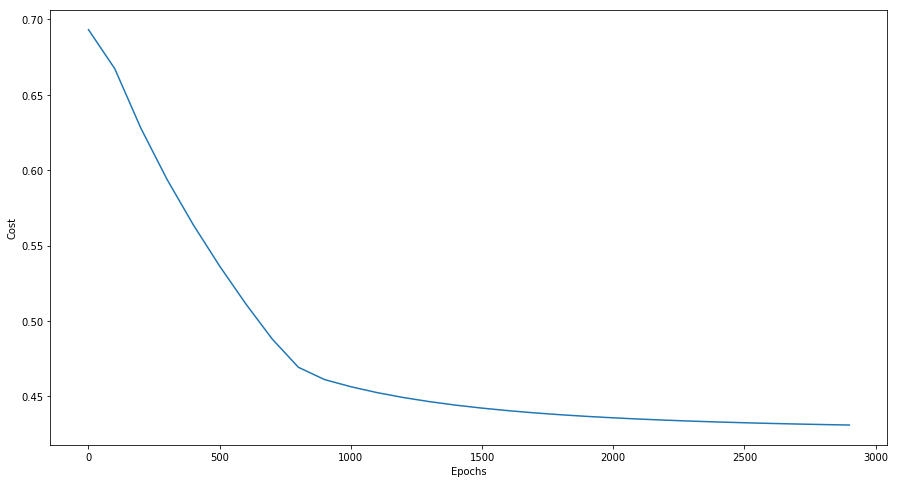

In [33]:
sns.lineplot(np.arange(0,3000,100),s.costs[::100])
plt.xlabel('Epochs')
plt.ylabel('Cost')

### Comparing with sklearns's sgdclass

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
s = LogisticRegression()
s.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(test_y,s.predict(test_x))

0.8299492385786802

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
accuracy_score(train_y,rf.predict(train_x))

0.8835690968443961

In [ ]:
!jupyter nbconvert --to script Log_reg.ipynb

In [44]:
# Cross_val_score

In [95]:
s3 = LogisticRegression()

In [96]:
from sklearn.model_selection import cross_val_score
s2 = cross_val_score(s3, train_x, train_y, cv=5, scoring='f1')

In [97]:
s2.mean()

0.6848522078861687

In [98]:
s3.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
c = confusion_matrix(test_y, s3.predict(test_x))

In [101]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

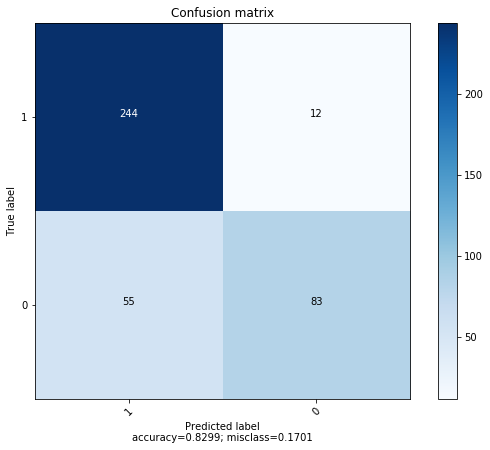

In [102]:
plot_confusion_matrix(c, target_names = [1,0], normalize = False)

In [105]:
precision = 244/(244+55)
precision

0.8160535117056856

In [106]:
recall = 244/(244+12)
recall

0.953125

In [107]:
f1 = 2*precision*recall/(precision+recall)
f1

0.8792792792792794

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

In [109]:
roc_sc = roc_auc_score(test_y, s3.predict(test_x))
fpr, tpr, thr = roc_curve(test_y, s3.predict_proba(test_x)[:, 1])

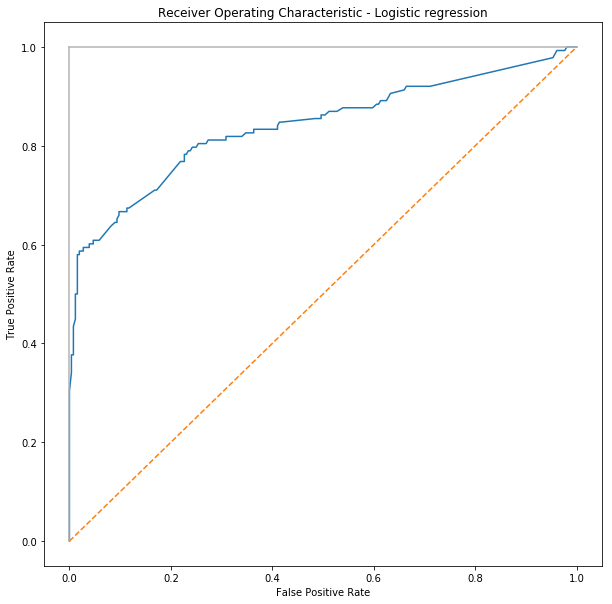

In [110]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()